# Diamond Price Prediction

According to GIA's grading system (https://www.gia.edu/diamond-quality-factor), a diamond is described and classified based on the four C's: Carat, Colour, Clarity and Cut. Here we analyzed diamond price using a dataset from Kaggle https://www.kaggle.com/shivam2503/diamonds, which included the four C's, in addition to depth, table size ('table'), length ('x'), width ('y') and depth ('z'), of 53940 diamonds. 

This analysis was based in Python and includes retrieving data from a CSV file, data mining, analytics, modelling and data visualization. The Python libraries Numpy and panda were used for data manipulation, seaborn and matplotlib for creating visualizations, and Scikit-Learn for construction and evaluation of regression models.

## Import libraries

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from yellowbrick.model_selection import ValidationCurve

## Import dataset

In [229]:
# Import dataset
diamond = pd.read_csv('diamonds.csv')

In [230]:
# View dataset
diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


There are 10 features and 53940 entries in the original dataset.

In [231]:
# View data types
diamond.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

## Data Cleaning

### 1. Removed irrelevant column 'Unnamed: 0'

In [232]:
# Delete the first column which is irrelvant
diamond = diamond.drop(['Unnamed: 0'], axis=1)

### 2. Removed duplicated rows

In [233]:
# Find the number of duplicated rows
print('Number of duplicated rows:')
diamond.duplicated().sum()

Number of duplicated rows:


146

In [234]:
# Remove duplicated rows
diamond = diamond[~diamond.duplicated()]

### 3. Removed zero values in columns 'x', 'y' and 'z' (length, width and height of diamonds)

Although there were no null values in the dataset, the columns 'x', 'y' and 'z' (length, width and height of diamonds) contained missing data in the form of zero values. The zero values were associated with the higher priced diamonds, but there were few zero values compared to the size of the dataset (approximately 0.04% of dataset). We therefore removed entries with zero 'x', 'y' or 'z' values.

In [235]:
# Find number of null values
print('Number of null values:')
diamond.isna().sum()

Number of null values:


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [236]:
# Basic Statistics
diamond.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [237]:
# Find the number of zero values
print('Number of zero values in each column:')
col_names = []
num_zero_values = []
for column in diamond.columns:
  if diamond[column].dtypes != 'object':
    col_names.append(column)
    num_zero_values.append(diamond[diamond[column]==0].price.count())
zero_count = pd.Series(num_zero_values, index = col_names)
print(zero_count)

Number of zero values in each column:
carat     0
depth     0
table     0
price     0
x         7
y         6
z        19
dtype: int64


In [238]:
# Dimensions of the dataset
diamond.shape

(53794, 10)

In [239]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [240]:
# Replace zero values in columns 'x', 'y' and 'z' with null values
diamond.x = diamond.x.replace(0, np.nan)
diamond.y = diamond.y.replace(0, np.nan)
diamond.z = diamond.z.replace(0, np.nan)

Distribution of zero values:


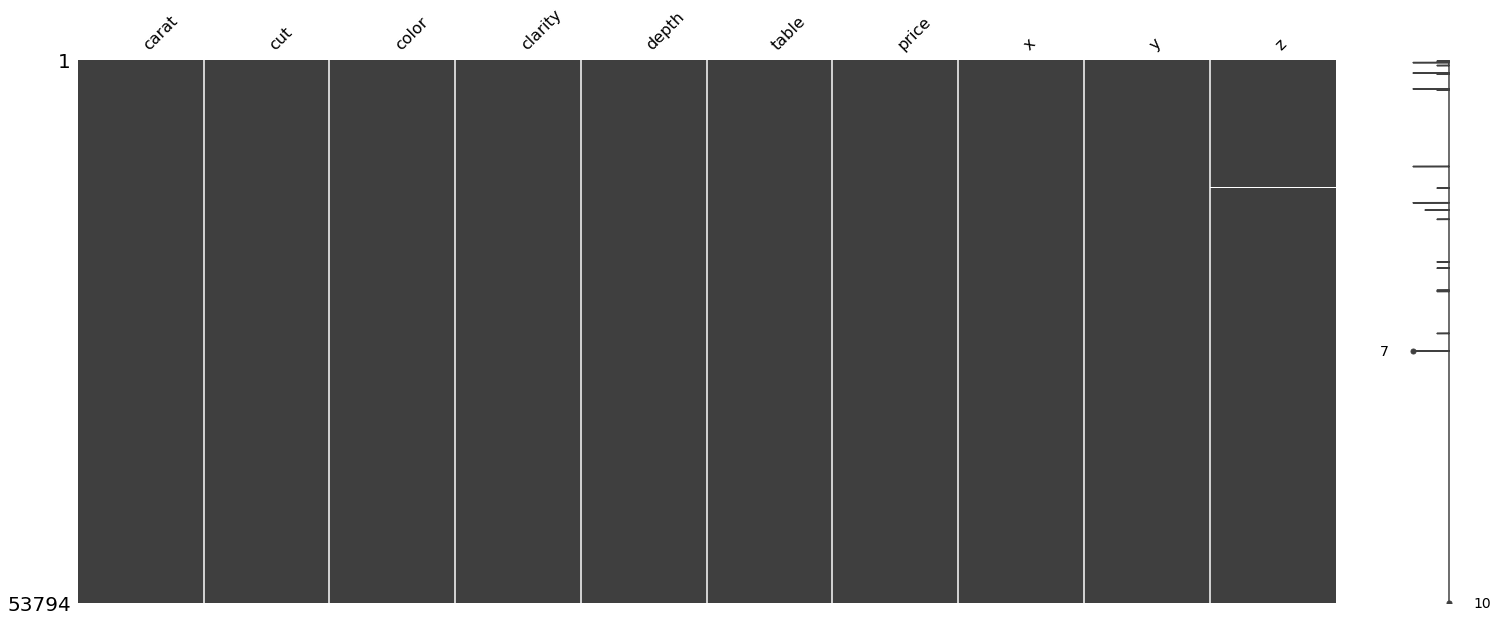

In [241]:
# Visualise distribution of zero values
import missingno as msno
print('Distribution of zero values:')
diamondbyPrice =  diamond.sort_values(by = 'price', ascending = False)
msno.matrix(diamondbyPrice)
plt.show()

In [242]:
# Remove missing values in columns x, y and z
diamond = diamond.dropna(subset = ['x','y','z'])

In [243]:
# Dimensions of the cleaned dataset
diamond.shape

(53775, 10)

### 4. Discarded outliers

Removed outliers more than 3 standard deviations away from  mean.

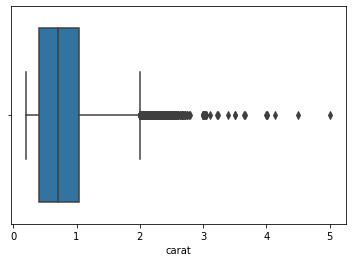

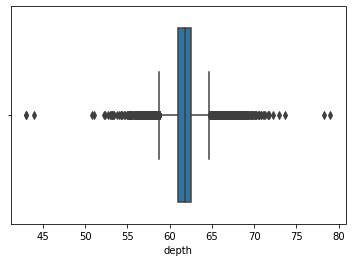

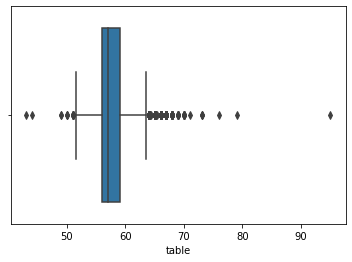

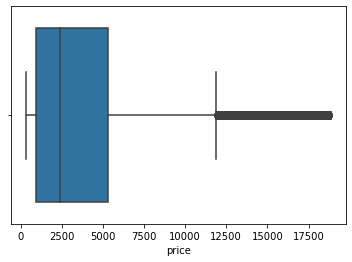

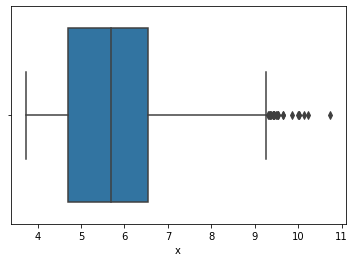

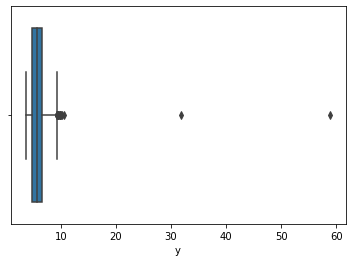

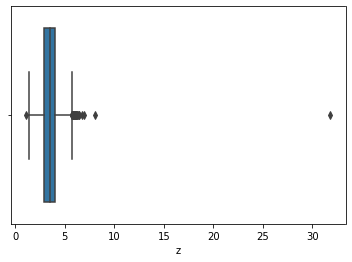

In [244]:
# Visualize outliers
for column in diamond.columns:
    if diamond[column].dtype != 'object':
        sns.boxplot(data = diamond, x = diamond[column])
        plt.show()

In [270]:
# Remove outliers more than 3 standard deviations above or below mean
for column in diamond.columns:
    if diamond[column].dtypes != 'object':
        column_std = diamond[column].std()
        column_mean = diamond[column].mean()
        upper_limit = column_mean + 3*column_std
        lower_limit = column_mean - 3*column_std
        upper_outliers = diamond[column] > upper_limit
        lower_outliers = diamond[column] < lower_limit
        diamond = diamond[~upper_outliers & ~lower_outliers]

## Data Exploration

In [273]:
# Dimensions of cleaned dataset
diamond.shape

(51049, 10)

In [277]:
# View summary statistics of numerical columns
diamond.describe()

,carat,depth,table,price,x,y,z
count,51049.000000,51049.000000,51049.000000,51049.000000,51049.000000,51049.000000,51049.000000
mean,0.755398,61.757404,57.340547,3541.437051,5.648285,5.651938,3.489105
std,0.420092,1.262729,2.058966,3364.930701,1.050485,1.043539,0.648991
min,0.200000,57.500000,51.000000,326.000000,3.730000,3.680000,1.530000
25%,0.390000,61.100000,56.000000,922.000000,4.680000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,2287.000000,5.650000,5.650000,3.490000
75%,1.020000,62.500000,59.000000,5016.000000,6.480000,6.480000,4.010000
max,2.210000,66.000000,63.500000,15451.000000,8.600000,8.530000,5.300000


In [73]:
# View unique variables in each categorical column
for column in diamond.columns:
    if diamond[column].dtypes == 'object':
        print(column +':')
        print(diamond[column].unique())
        print('\n')

cut:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


color:
['E' 'I' 'J' 'H' 'F' 'G' 'D']


clarity:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']




In [276]:
# View summary statistics of categorical columns
diamond.describe(include = 'object')

,cut,color,clarity
count,51049,51049,51049
unique,5,7,8
top,Ideal,G,SI1
freq,20989,10773,12405


In [278]:
# Find the coefficient of variation
print('Coefficient of variation:')
diamond.std()/diamond.mean()

Coefficient of variation:


carat    0.556120
depth    0.020447
table    0.035908
price    0.950160
x        0.185983
y        0.184634
z        0.186005
dtype: float64

In [279]:
# Find the skewness
print('Skewness:')
diamond.skew()

Skewness:


carat    0.872249
depth   -0.274959
table    0.370203
price    1.424091
x        0.309096
y        0.302736
z        0.303191
dtype: float64

In [280]:
# Find Pearson correlation coefficients
print('Pearson correlation coefficients:')
diamond.corr()

Pearson correlation coefficients:


,carat,depth,table,price,x,y,z
carat,1.000000,0.029284,0.186482,0.922541,0.982424,0.981514,0.981452
depth,0.029284,1.000000,-0.274074,-0.001304,-0.020578,-0.023129,0.092306
table,0.186482,-0.274074,1.000000,0.133967,0.192507,0.187673,0.159254
price,0.922541,-0.001304,0.133967,1.000000,0.891776,0.892974,0.888461
x,0.982424,-0.020578,0.192507,0.891776,1.000000,0.998623,0.992618
y,0.981514,-0.023129,0.187673,0.892974,0.998623,1.000000,0.992307
z,0.981452,0.092306,0.159254,0.888461,0.992618,0.992307,1.000000


Pearson correlation matrix


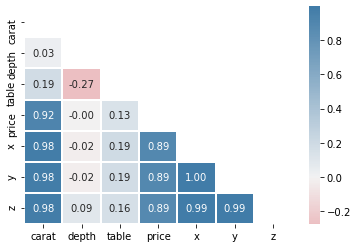

In [281]:
# Visualize Pearson correlation matrix
print('Pearson correlation matrix')
corr = diamond.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
ax = sns.heatmap(diamond.corr(), mask=mask, center=0, cmap=cmap,\
     linewidths=1, annot=True, fmt=".2f")
plt.show()

There is very strong correlation between price, carat, x, y, and z.

[]

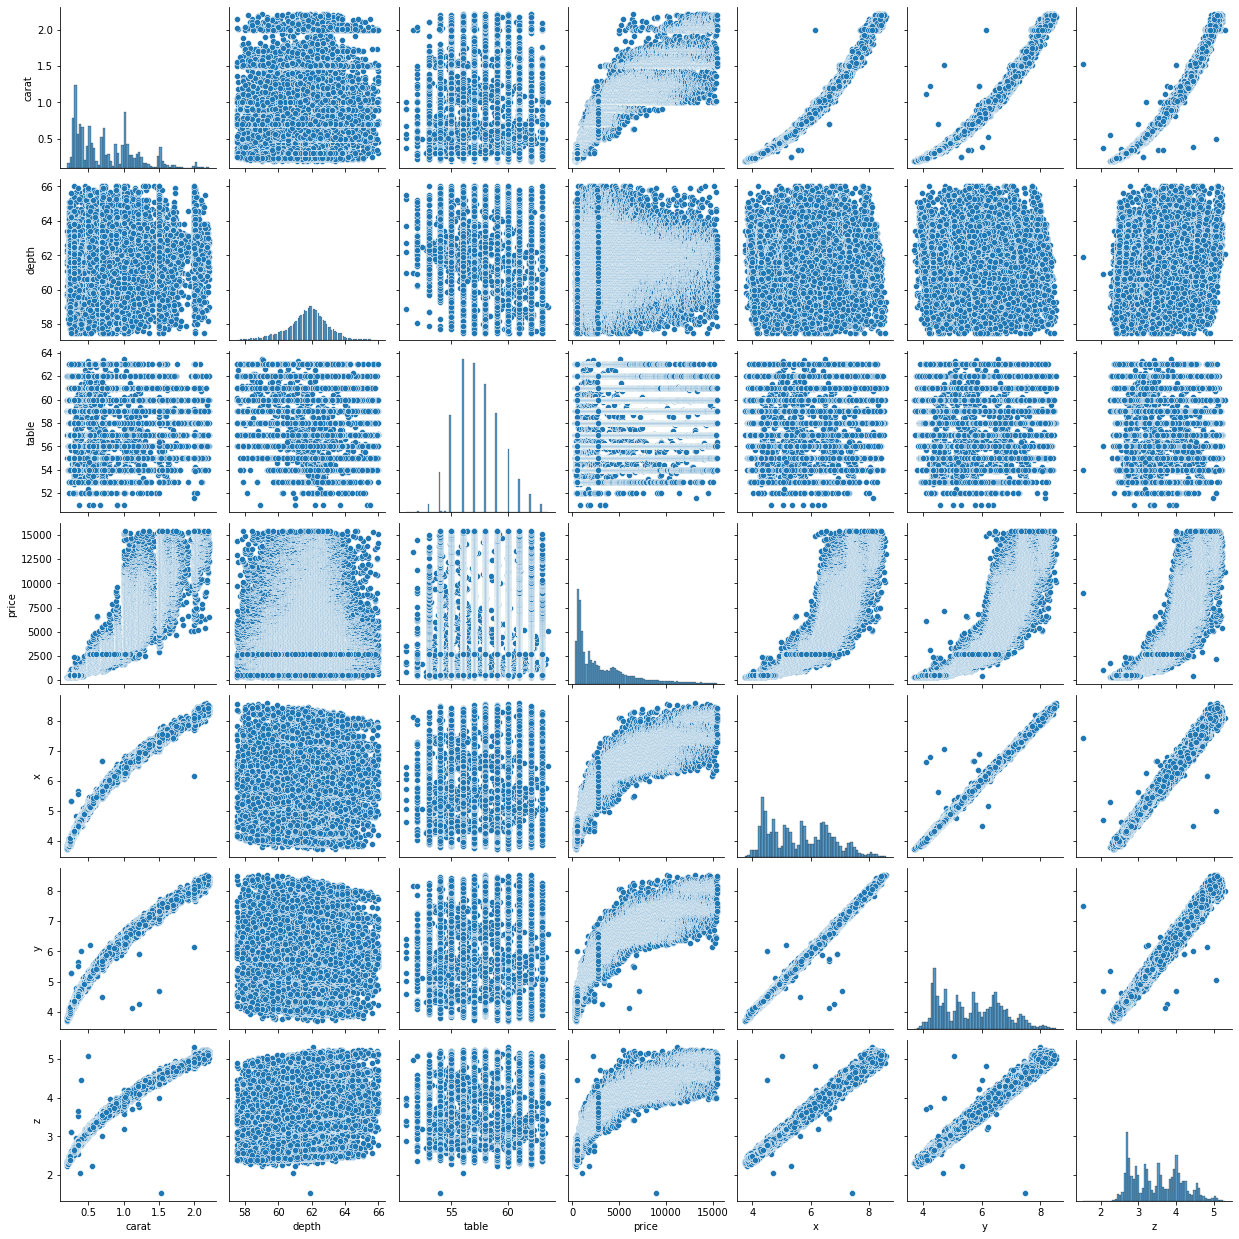

In [282]:
# Visualize pairwise correlation and distribution of numeric features
sns.pairplot(diamond, diag_kind='hist')
plt.plot()

### 1. Carat

In [283]:
weight = [0.25,0.5,0.75,1,1.25,1.5]
for k in weight:
 NumSmaller = diamond[diamond.carat <= k].carat.count()
 print('%.2f%% of the diamonds in the dataset are less than %.2f carat'\
       %(NumSmaller/len(diamond),k))

0.02% of the diamonds in the dataset are less than 0.25 carat
0.37% of the diamonds in the dataset are less than 0.50 carat
0.58% of the diamonds in the dataset are less than 0.75 carat
0.70% of the diamonds in the dataset are less than 1.00 carat
0.88% of the diamonds in the dataset are less than 1.25 carat
0.93% of the diamonds in the dataset are less than 1.50 carat


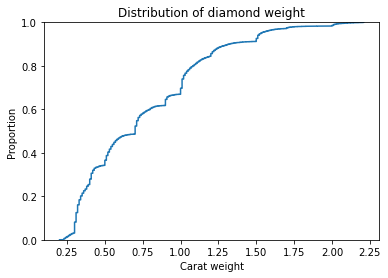

In [284]:
sns.ecdfplot(diamond.carat)
plt.title('Distribution of diamond weight')
plt.xlabel('Carat weight')
plt.show()

Carat increases with price.

### 2. Cut

In [285]:
diamond.groupby('cut').size()

cut
Fair           897
Good          4305
Ideal        20989
Premium      13163
Very Good    11695
dtype: int64

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


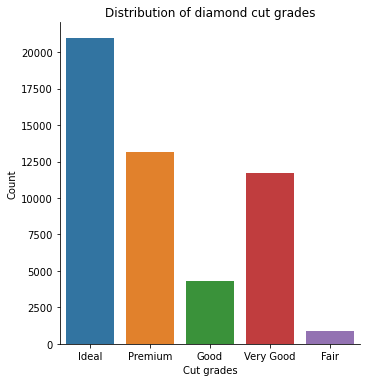

In [286]:
sns.catplot(data=diamond, x="cut", kind="count")
plt.title('Distribution of diamond cut grades')
plt.xlabel('Cut grades')
plt.ylabel('Count')
plt.show()

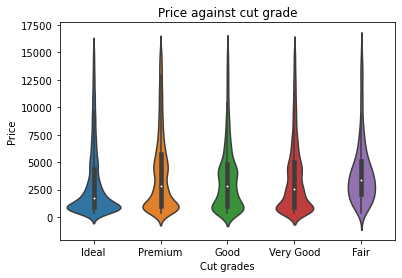

In [287]:
sns.violinplot(data=diamond, x='cut', y='price')
plt.title('Price against cut grade')
plt.xlabel('Cut grades')
plt.ylabel('Price')
plt.show()

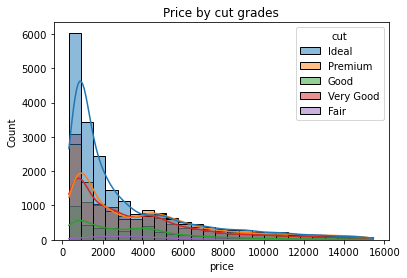

In [289]:
sns.histplot(data=diamond, x='price', bins=25, hue='cut', kde=True)
plt.title('Price by cut grades')
plt.show()

Most of the diamonds in the dataset have 'Very Good', 'Premium' or 'Ideal' cut grades. 
The 'Fair' cut diamonds appeared most expensive.

### 3. Color

In [290]:
diamond.groupby('color').size()

color
D     6532
E     9424
F     9092
G    10773
H     7740
I     4921
J     2567
dtype: int64

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


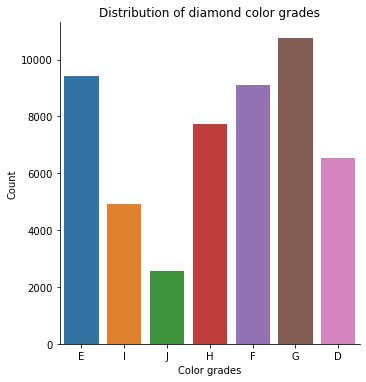

In [291]:
sns.catplot(data=diamond, x="color", kind="count")
plt.title('Distribution of diamond color grades')
plt.xlabel('Color grades')
plt.ylabel('Count')
plt.show()

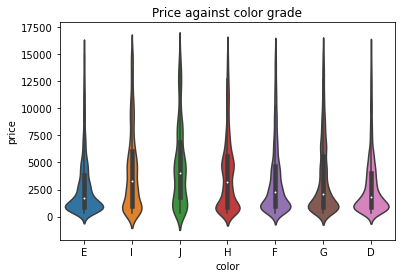

In [292]:
sns.violinplot(data=diamond, x='color', y='price')
plt.title('Price against color grade')
plt.show()

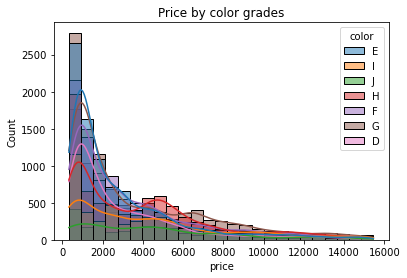

In [293]:
sns.histplot(x="price", data=diamond, bins=25, hue="color", kde=True)
plt.title('Price by color grades')
plt.show()

Most diamonds in the dataset had 'E', 'F' or 'G' colour grades.
The 'H', 'I' or 'J' coloured diamonds appeared more expensive. 

### 4. Clarity

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


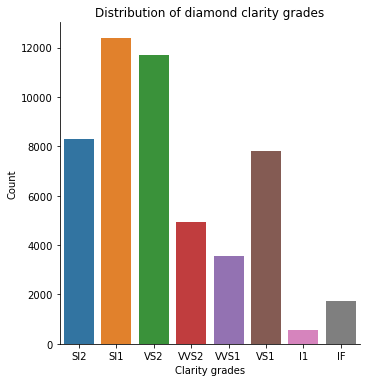

In [294]:
sns.catplot(data=diamond, x="clarity", kind="count")
plt.title('Distribution of diamond clarity grades')
plt.xlabel('Clarity grades')
plt.ylabel('Count')
plt.show()

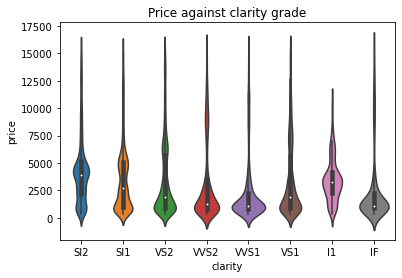

In [295]:
sns.violinplot(data=diamond, x='clarity', y='price')
plt.title('Price against clarity grade')
plt.show()

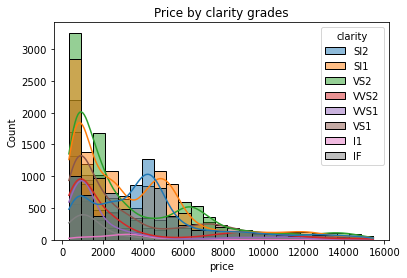

In [296]:
sns.histplot(data=diamond, x="price", bins=25, hue="clarity", kde=True)
plt.title('Price by clarity grades')
plt.show()

Most diamonds in the dataset had 'SI1' or 'VS2' clarity grade.
Diamonds of 'I1', 'SI1' and 'SI2' appeared more expensive.


### 5. Depth

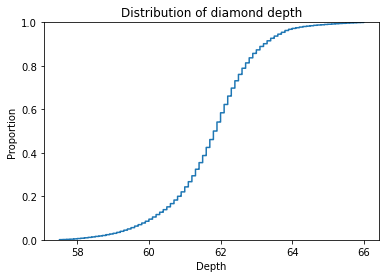

In [297]:
sns.ecdfplot(diamond.depth)
plt.title('Distribution of diamond depth')
plt.xlabel('Depth')
plt.show()

### 6. Table

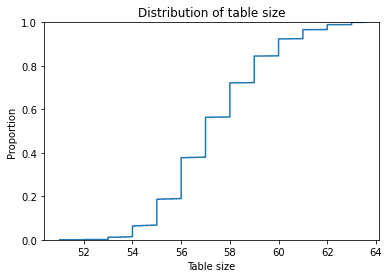

In [298]:
sns.ecdfplot(diamond.table)
plt.title('Distribution of table size')
plt.xlabel('Table size')
plt.show()

### 7. x

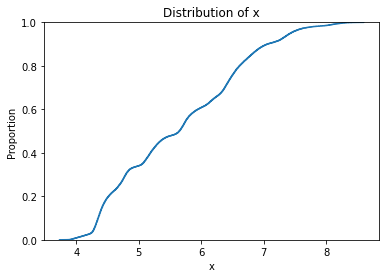

In [299]:
sns.ecdfplot(diamond.x)
plt.title('Distribution of x')
plt.xlabel('x')
plt.show()

### 8. y

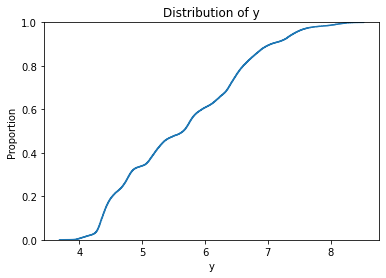

In [300]:
sns.ecdfplot(diamond.y)
plt.title('Distribution of y')
plt.xlabel('y')
plt.show()

### 9. z

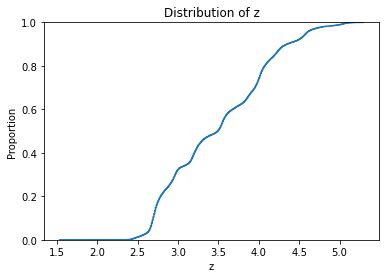

In [301]:
sns.ecdfplot(diamond.z)
plt.title('Distribution of z')
plt.xlabel('z')
plt.show()

## Encode Categorical Variables

In [302]:
diamond['cut'] = diamond.cut.map({'Fair':0, 'Good':1, 'Very Good':2,\
                                  'Premium':3, 'Ideal':4})

In [303]:
diamond['color'] = diamond.color.map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4,\
                                      'E':5, 'D':6})

In [304]:
diamond['clarity'] = diamond.clarity.map({'I1':0, 'SI2':1, 'SI1':2,\
                                          'VS2':3, 'VS1':4, 'VVS2':5,\
                                          'VVS1':6, 'IF':7})

## Feature Engineering

### Case 1: Use all 9 features

In [356]:
# Divide data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(diamond.loc[:,\
                                   diamond.columns != 'price'], \
                                   diamond.price,test_size=0.2, \
                                   random_state=1)

In [357]:
# Apply Standard Scaling to numerical columns
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [358]:
# Instantiate regression models
linear = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR(kernel='rbf')

In [359]:
# Create function that performs cross-validation and evaluates 
# each regressor
def models_evaluation(X_train, y_train):
    
    # Use 'neg_mean_squared_error' as performance metric
    scoring = 'neg_root_mean_squared_error'
    
    # Perform cross-validation on each regressor
    cv_linear = cross_validate(linear, X_train, y_train, cv=5, \
                               scoring=scoring, \
                               return_train_score=True)
    cv_knn = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring,\
                            return_train_score=True)
    cv_dt = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring,\
                           return_train_score=True)
    cv_rf = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring,\
                           return_train_score=True)
    cv_svm = cross_validate(svm, X_train, y_train, cv=5, scoring=scoring,\
                            return_train_score=True)
    
    # Store mean performance metric scores for each regressor
    mean_scores_table = pd.DataFrame({'Linear Regression':\
                                      [cv_linear['test_score'].mean()],
                                       'K-Nearest Neighbor':\
                                      [cv_knn['test_score'].mean()],
                                      'Decision Tree':\
                                      [cv_dt['test_score'].mean()],
                                       'Random Forest':\
                                      [cv_rf['test_score'].mean()],
                                       'Support Vector Machine':\
                                      [cv_svm['test_score'].mean()]},
                                      index=\
                                     ['Negative Root Mean Squared Error'])
    
    # Add 'Best Score' column to 'mean_scores_table'
    mean_scores_table['Best Score'] = mean_scores_table.idxmax(axis=1)  

    # Store standard deviation of performance metric for each regressor
    std_scores_table = pd.DataFrame({'Linear Regression':\
                                     [cv_linear['test_score'].std()],
                                       'K-Nearest Neighbor':\
                                     [cv_knn['test_score'].std()],
                                      'Decision Tree':\
                                     [cv_dt['test_score'].std()],
                                       'Random Forest':\
                                     [cv_rf['test_score'].std()],
                                       'Support Vector Machine':\
                                     [cv_svm['test_score'].std()]},
                                      index=\
                                    ['Negative Root Mean Squared Error'])
   
    # Add 'Minimum standard deviation' column to 'std_scores_table'
    std_scores_table['Minimum standard deviation'] = \
    std_scores_table.idxmin(axis=1)  

    return mean_scores_table, std_scores_table

In [360]:
# Evaluate the regressors
mean_scores_table_all, std_scores_table_all = \
models_evaluation(X_train, y_train)

In [361]:
# Display mean performance metric scores for each regressor
mean_scores_table_all

,Linear Regression,K-Nearest Neighbor,Decision Tree,Random Forest,Support Vector Machine,Best Score
Negative Root Mean Squared Error,-973.74571,-584.193297,-596.970219,-442.03455,-2142.365449,Random Forest


In [362]:
# Display standard deviation of performance metric for each regressor
std_scores_table_all

,Linear Regression,K-Nearest Neighbor,Decision Tree,Random Forest,Support Vector Machine,Minimum standard deviation
Negative Root Mean Squared Error,19.211312,8.131965,11.380985,7.071714,45.733706,Random Forest


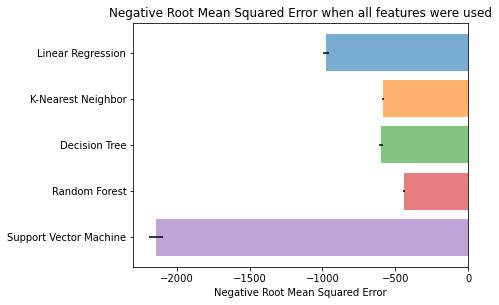

In [363]:
# Visualize mean and standard deviation of cross-validation accuracy of 
# regressors when all features were used
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table_all.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table_all)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table_all.iloc[k,j], \
               xerr=std_scores_table_all.iloc[k,j], \
               alpha=0.6, align='center')
   plt.title('%s when all features were used'\
             %mean_scores_table_all.index[k])
   plt.xlabel('%s'%mean_scores_table_all.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

When all features were used, Random Forest algorithm was most robust with the lowest mean root squared error. Decision Tree and K-Nearest Neightbour were the next most robust algorithms.

### Case 2: Remove columns 'x', 'y' and 'z' and use only 6 features

The columns 'x', 'y' and 'z' (length, width and depth of diamonds) showed very strong correlation with each other and with 'carat' (multicollinearity). In this experiment, we will investigate the effects of removing columns 'x', 'y' and 'z'.

In [364]:
# Remove columns 'x', 'y' and 'z' from training and test data
X_train = X_train.drop(['x', 'y', 'z'], axis=1)
X_test = X_test.drop(['x', 'y', 'z'], axis=1)

In [365]:
# Instantiate regression models
linear = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
svm = SVR(kernel='rbf')

In [366]:
# Evaluate the regressors
mean_scores_table_6features, std_scores_table_6features = \
models_evaluation(X_train, y_train)

In [367]:
# Display mean performance metric scores for each regressor
rmse_results = pd.concat([mean_scores_table_all, \
                          mean_scores_table_6features],axis=0)
rmse_results.index = ['all features', '6 features']
print('Average Negative Root Mean Squared Error:')
rmse_results

Average Negative Root Mean Squared Error:


,Linear Regression,K-Nearest Neighbor,Decision Tree,Random Forest,Support Vector Machine,Best Score
all features,-973.745710,-584.193297,-596.970219,-442.034550,-2142.365449,Random Forest
6 features,-1002.938903,-721.121683,-596.806221,-453.289808,-2753.848347,Random Forest


In [368]:
# Display standard deviation of performance metric for each regressor
rmse_std_results = pd.concat([std_scores_table_all,\
                              std_scores_table_6features],axis=0)
rmse_std_results.index = ['all features', '6 features']
print('Average Standard Deviation of Negative Root Mean Squared Error:')
rmse_std_results

Average Standard Deviation of Negative Root Mean Squared Error:


,Linear Regression,K-Nearest Neighbor,Decision Tree,Random Forest,Support Vector Machine,Minimum standard deviation
all features,19.211312,8.131965,11.380985,7.071714,45.733706,Random Forest
6 features,18.848189,12.421459,6.935140,7.263093,51.683063,Decision Tree


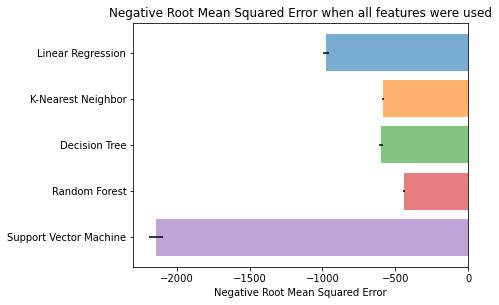

In [369]:
# Visualize mean and standard deviation of cross-validation accuracy of 
# regressors when all features were used
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table_all.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table_all)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table_all.iloc[k,j],\
               xerr=std_scores_table_all.iloc[k,j],\
               alpha=0.6, align='center')
   plt.title('%s when all features were used'\
             %mean_scores_table_all.index[k])
   plt.xlabel('%s'%mean_scores_table_all.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

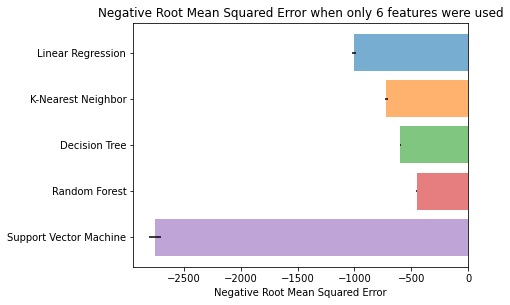

In [370]:
# Visualize mean and standard deviation of cross-validation accuracy of 
# regressors when only 6 features were used
x_labels = ['Linear Regression',
            'K-Nearest Neighbor',
            'Decision Tree',
            'Random Forest',
            'Support Vector Machine']
n_bars = len(mean_scores_table_6features.iloc[0,:-1])
xval = np.arange(n_bars)
ax = plt.figure(figsize = (6,26))
for k in range(len(mean_scores_table_6features)):
   ax = plt.subplot(5,1,k+1)
   for j in xval:
      plt.barh([j], mean_scores_table_6features.iloc[k,j],\
               xerr=std_scores_table_6features.iloc[k,j], alpha=0.6,\
               align='center')
   plt.title('%s when only 6 features were used'\
             %mean_scores_table_6features.index[k])
   plt.xlabel('%s'%mean_scores_table_6features.index[k])
   ax.set_yticks(xval)
   ax.invert_yaxis()
   ax.set_yticklabels(x_labels)
plt.show()

As expected, the root mean squared error increased in magnitude when fewer features were used. Nonetheless, for the best two algorithms, Decision Tree and Random Forest, there was little change in root mean squared error upon removing the 3 features 'x','y' and 'z' (length, width and depth of diamonds). As removing these 3 features has the advantages of eliminating multicollinearity and reducing model complexity, we will use only 6 features, i.e. all features except 'x', 'y' and 'z', when developing the final model.

Similar to the case when all features were used, Random Forest was the most robust algorithm with the smallest root mean squared error. Decision Tree and K-Nearest Neightbour were the next most robust algorithms.

## Hyperparameter optimization

We will optimize the hyperparameters of the three best algorithms, Random Forest, Decision Tree and K-Nearest Neighobur, by visualizing the optimal values of selected hyperparameters then fine tuning using random search.

###  1. Optimizing Random Forest model

First, we visualize the changes in validation score when each hyperparmeter is varied.

In [385]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#### n_estimators

n_estimators refer to the number of trees in the Random Forest.

The performance of the algorithm inscreased sharply when n_estimators increased from 10 to 100, but became stabilised beyond 100 trees. We will use 100 trees to build the optimized model.

In [375]:
# Create Validation Curve for the tuning of n_estimators
rf_viz_n_estimators = ValidationCurve(\
                      rf, param_name="n_estimators",\
                      param_range=np.arange(10,500,10), cv=5,\
                      scoring="neg_mean_squared_error")

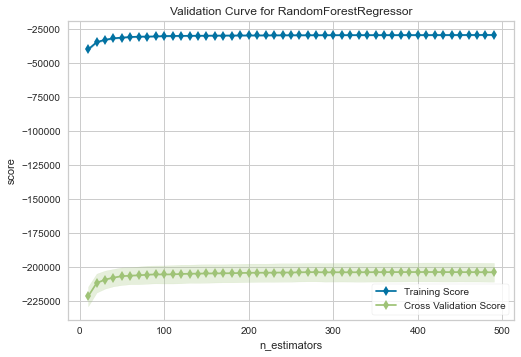

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='n_estimators', ylabel='score'>

In [376]:
# Display the Validation Curve for the tuning of n_estimators
rf_viz_n_estimators.fit(X_train, y_train)
rf_viz_n_estimators.show()

#### max_depth

max_depth is the maximum depth of a tree in the Random Forest.

The performance of the model increased sharply when max_depth increased from 1 to 7, but the model became overfitted beyond a max_depth of 7.

In [381]:
# Create Validation Curve for the tuning of max_depth
rf_viz_max_depth = ValidationCurve(\
                   rf, param_name="max_depth",\
                   param_range=np.arange(1,50,2), cv=5,\
                   scoring="neg_mean_squared_error")

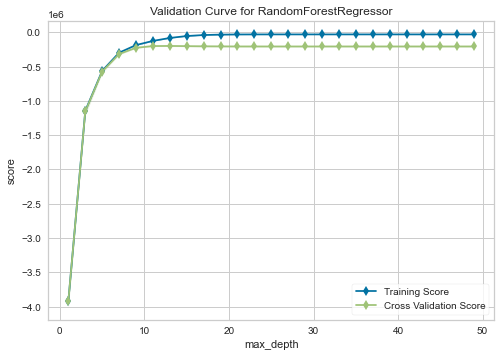

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [382]:
# Display the Validation Curve for the tuning of max_depth
rf_viz_max_depth.fit(X_train, y_train)
rf_viz_max_depth.show()

In [421]:
# Create Validation Curve for the tuning of max_depth
rf_viz_max_depth = ValidationCurve(\
                   rf, param_name="max_depth",\
                   param_range=np.arange(1,15,1), cv=5,\
                   scoring="neg_mean_squared_error")

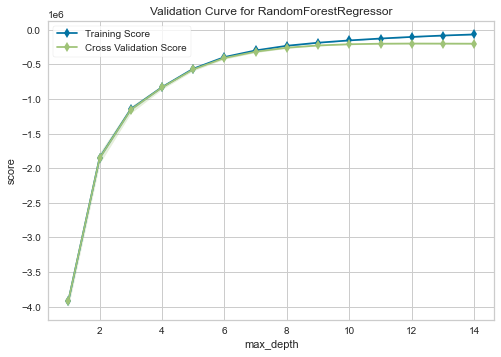

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_depth', ylabel='score'>

In [422]:
# Display the Validation Curve for the tuning of max_depth
rf_viz_max_depth.fit(X_train, y_train)
rf_viz_max_depth.show()

#### min_samples_split

min_samples_split is the minimum number or fraction of samples required for each split.

The model is most robust at min_samples_split of 14. Further increase in minimum_sample_split resulted in underfitting, because fewer splits were possible.

In [392]:
# Create Validation Curve for the tuning of min_samples_split
rf_viz_min_samples_split = ValidationCurve(\
                          rf, param_name="min_samples_split",\
                          param_range=np.arange(0.05,1,0.05), cv=5,\
                          scoring="neg_mean_squared_error")

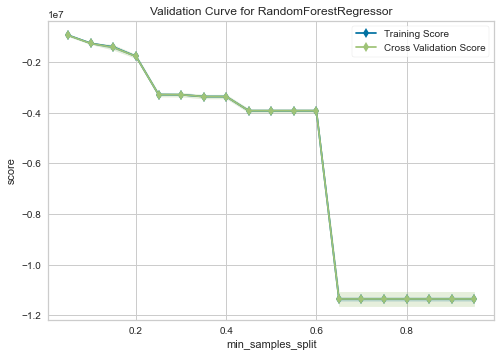

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='min_samples_split', ylabel='score'>

In [393]:
# Display the Validation Curve for the tuning of min_samples_split
rf_viz_min_samples_split.fit(X_train, y_train)
rf_viz_min_samples_split.show()

In [434]:
# Create Validation Curve for the tuning of min_samples_split
rf_viz_min_samples_split = ValidationCurve(\
                          rf, param_name="min_samples_split",\
                          param_range=np.arange(2,30,2), cv=5,\
                          scoring="neg_mean_squared_error")

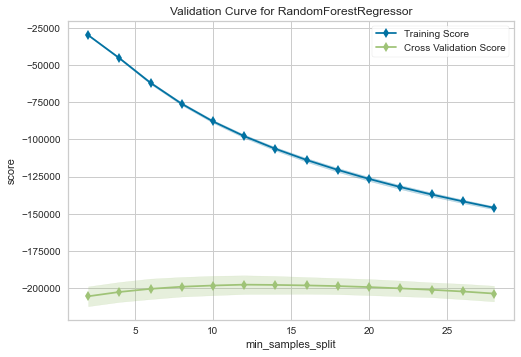

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='min_samples_split', ylabel='score'>

In [435]:
# Display the Validation Curve for the tuning of min_samples_split
rf_viz_min_samples_split.fit(X_train, y_train)
rf_viz_min_samples_split.show()

#### max_leaf_nodes

max_leaf_nodes is the maximum number of leaf nodes allowed in each tree.

The model performance increased sharply initially when max_leaf_nodes increased from 0 to 20. Beyond max_leaf_nodes of approximately 20, the model performance increased slowly and the model became increasingly overfitted.

In [665]:
# Create Validation Curve for the tuning of max_leaf_nodes
rf_viz_max_leaf_nodes = ValidationCurve(
                        rf, param_name="max_leaf_nodes",
                        param_range=np.arange(5,1000,20), cv=5,\
                        scoring="neg_mean_squared_error")

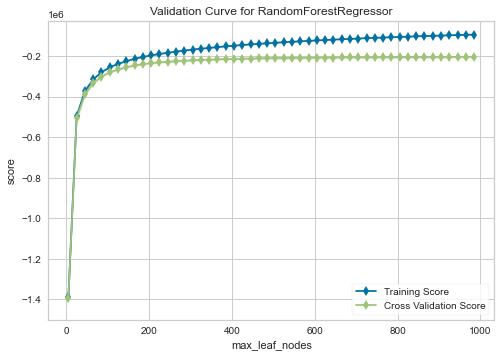

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_leaf_nodes', ylabel='score'>

In [666]:
# Display the Validation Curve for the tuning of max_leaf_nodes
rf_viz_max_leaf_nodes.fit(X_train, y_train)
rf_viz_max_leaf_nodes.show()

In [674]:
# Create Validation Curve for the tuning of max_leaf_nodes
rf_viz_max_leaf_nodes = ValidationCurve(\
                        rf, param_name="max_leaf_nodes",\
                        param_range=np.arange(5,150,5), cv=5,\
                        scoring="neg_mean_squared_error")

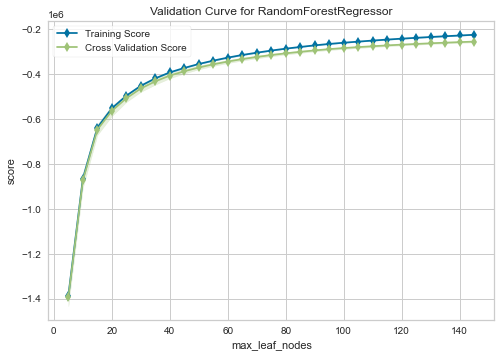

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_leaf_nodes', ylabel='score'>

In [675]:
# Display the Validation Curve for the tuning of max_leaf_nodes
rf_viz_max_leaf_nodes.fit(X_train, y_train)
rf_viz_max_leaf_nodes.show()

#### min_samples_leaf

min_samples_leaf is the minimum number of samples required to be at a leaf node. A split may occur only when it leaves at least min_samples_leaf training samples in each of the left and right branches.

The model was most robust at min_samples_leaf of 3 to 4. Further increase in min_samples_leaf resulted in model overfitting, as fewer splits were possible.

min_samples_leaf is the minimum number of samples required to be at a leaf node. A split is allowed only if there are at least min_samples_leaf training samples in each of the left and right branches.

The model has optimal performance when min_samples_leaf is 3 or 4. Further increase in min_samples_leaf resulted in underfitting.

In [398]:
# Create Validation Curve for the tuning of min_samples_leaf
rf_viz_min_samples_leaf = ValidationCurve(\
                          rf, param_name="min_samples_leaf",\
                          param_range=np.arange(1,4000,100), cv=5,\
                          scoring="neg_mean_squared_error")

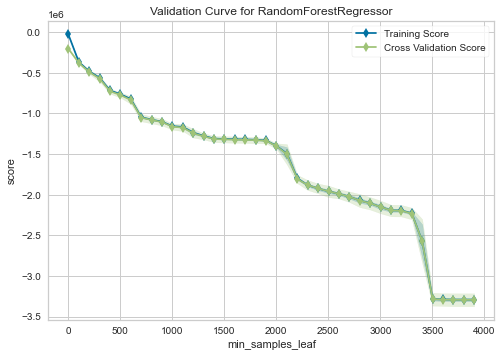

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='min_samples_leaf', ylabel='score'>

In [399]:
# Display the Validation Curve for the tuning of min_samples_leaf
rf_viz_min_samples_leaf.fit(X_train, y_train)
rf_viz_min_samples_leaf.show()

In [419]:
# Create Validation Curve for the fine tuning of min_samples_leaf
rf_viz_min_samples_leaf = ValidationCurve(\
                          rf, param_name="min_samples_leaf",\
                          param_range=np.arange(1,20,1), cv=5,\
                          scoring="neg_mean_squared_error")

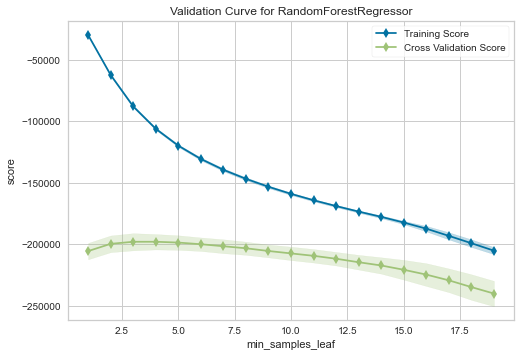

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='min_samples_leaf', ylabel='score'>

In [420]:
# Display the Validation Curve for the tuning of min_samples_leaf
rf_viz_min_samples_leaf.fit(X_train, y_train)
rf_viz_min_samples_leaf.show()

#### max_samples

max_samples is the number of samples to draw from the dataset to train each base estimator.

The model is most robust at max_samples of 0.25. The model became overfitted beyond 0.25, as the training dataset for the trees had greater overlap and the trees became more similar.

In [400]:
# Create Validation Curve for the tuning of max_samples
rf_viz_max_samples = ValidationCurve(\
                     rf, param_name="max_samples",\
                     param_range=np.arange(0.1,1.0,0.05), cv=5,\
                     scoring="neg_mean_squared_error")

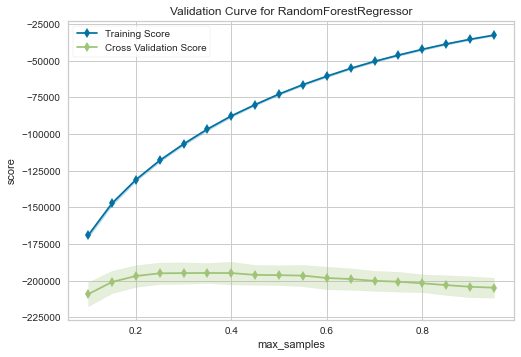

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_samples', ylabel='score'>

In [401]:
# Display the Validation Curve for the tuning of max_samples
rf_viz_max_samples.fit(X_train, y_train)
rf_viz_max_samples.show()

#### max_features

max_features is the maximum number of features to consider at each split.

The model is most robust at max_features of 3 or 4. As more features are considered, the trees became increasingly similar and the model became overfitted.

In [406]:
# Create Validation Curve for the tuning of max_features
rf_viz_max_features = ValidationCurve(\
                      rf, param_name="max_features",\
                      param_range=np.arange(1,7,1), cv=5,\
                      scoring="neg_mean_squared_error")

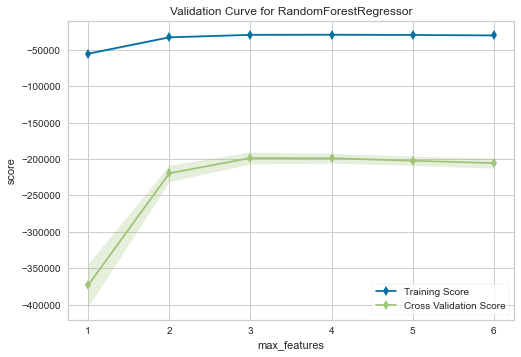

<AxesSubplot:title={'center':'Validation Curve for RandomForestRegressor'}, xlabel='max_features', ylabel='score'>

In [407]:
# Display the Validation Curve for the tuning of max_features
rf_viz_max_features.fit(X_train, y_train)
rf_viz_max_features.show()

#### Random Search for Random Forest algorithm

In [685]:
rf_params = {'n_estimators':[100],\
             'max_depth':[5,6,7],
             'min_samples_split':[10,12,14],\
             'max_leaf_nodes':[100,150,200],\
             'min_samples_leaf':[2,3,4],\
             'max_samples':[0.2,0.25,0.3],\
             'max_features':[2,3,4]}
randomizedsearch_rf = RandomizedSearchCV(estimator = rf,\
                      param_distributions=rf_params, n_iter=25,\
                      scoring='neg_root_mean_squared_error', cv=5, verbose=1,\
                      random_state =1)

In [686]:
randomizedsearch_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'max_features': [2, 3, 4],
                                        'max_leaf_nodes': [100, 150, 200],
                                        'max_samples': [0.2, 0.25, 0.3],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [10, 12, 14],
                                        'n_estimators': [100]},
                   random_state=1, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [687]:
print("Best parameters: " , randomizedsearch_rf.best_params_)
print("Smallest Magnitude of Root Mean-Squared Error: ", randomizedsearch_rf.best_score_)

Best parameters:  {'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_samples': 0.25, 'max_leaf_nodes': 150, 'max_features': 4, 'max_depth': 7}
Smallest Magnitude of Root Mean-Squared Error:  -565.5895903420369


In [707]:
# Fit optimized Random Forest model to all training data
best_rf = RandomForestRegressor(n_estimators=100, 
                                min_samples_split=12,\
                                min_samples_leaf=3,\
                                max_leaf_nodes=150,\
                                max_samples=0.25,\
                                max_features=4,\
                                max_depth=7, random_state=1)
best_rf.fit(X_train, y_train)
y_pred_train = best_rf.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
y_pred_test = best_rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Train Root Mean-Squared Error: %.2f' % rmse_train)
print('Test Root Mean-Squared Error: %.2f' % rmse_test)

Train Root Mean-Squared Error: 549.98
Test Root Mean-Squared Error: 556.74


In [691]:
best_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 4,
 'max_leaf_nodes': 150,
 'max_samples': 0.25,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

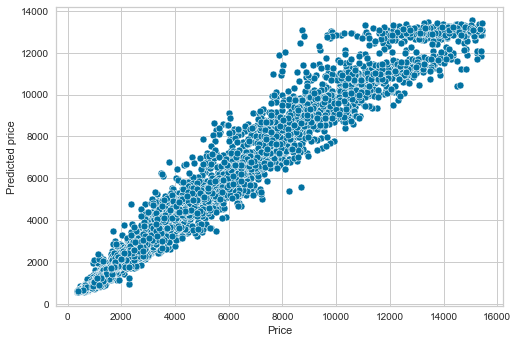

In [692]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_pred_test)
plt.ylabel('Predicted price')
plt.xlabel('Price')

In [693]:
r2_score(y_test,y_pred_test)

0.9723458278045559

In [694]:
y_diff = y_pred_test - y_test
print('Mean price difference: %.2f' %np.mean(np.abs(y_diff)))

Mean price difference: 328.49


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Estimated price')

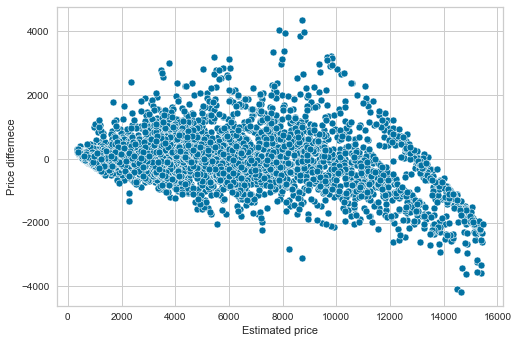

In [695]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_diff)
plt.ylabel('Price differnece')
plt.xlabel('Estimated price')

In [696]:
# Create a DataFrame with the feature importances
feature_importances = pd.DataFrame({"feature": list(X_train.columns),\
                     "importance": best_rf.feature_importances_}).\
                      sort_values("importance", ascending=False)

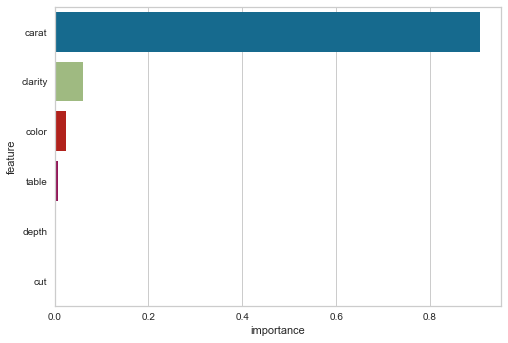

In [697]:
# Draw a horizontal barplot of importances_sorted
sns.barplot(data=feature_importances, x="importance", y="feature")
plt.show()

Feature importance analysis revealed 'carat' was by far the most importance feature for diamond price prediction. 'Clarity', 'color' and 'table' were the next most important features. 'Depth' and 'cut' were of negligible importance.

### 2. Optimizing Decision Tree model

#### max_depth

max_depth is the maximum depth of the Decision Tree.

The performance of the model increased sharply when max_depth increased from 1 to 10, but the model became overfitted beyond a max_depth of 10.

In [698]:
# Create Validation Curve for the tuning of max_depth
df_viz_max_depth = ValidationCurve(\
                   dt, param_name="max_depth",\
                   param_range=np.arange(1,100,10), cv=5,\
                   scoring="neg_mean_squared_error")

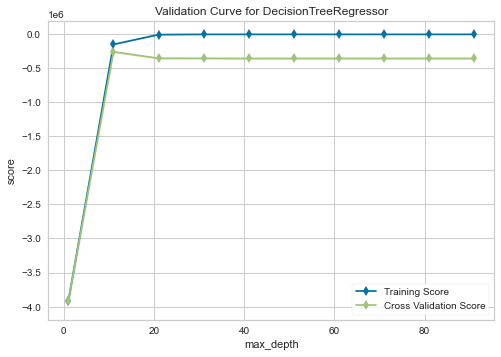

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [699]:
# Display the Validation Curve for the tuning of max_depth
df_viz_max_depth.fit(X_train, y_train)
df_viz_max_depth.show()

In [704]:
# Create Validation Curve for the tuning of max_depth
df_viz_max_depth = ValidationCurve(\
                   dt, param_name="max_depth",\
                   param_range=np.arange(1,20,1), cv=5,\
                   scoring="neg_mean_squared_error")

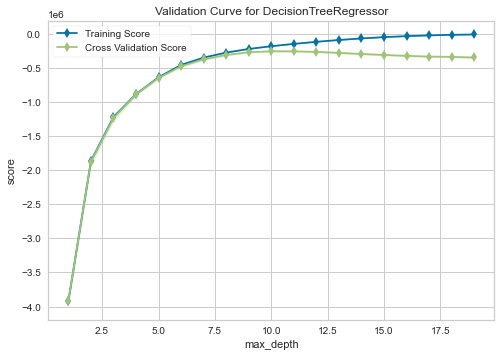

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [705]:
# Display the Validation Curve for the tuning of max_depth
df_viz_max_depth.fit(X_train, y_train)
df_viz_max_depth.show()

#### min_samples_leaf

min_samples_leaf is the minimum number of samples required to be at a leaf node. A split may occur only when it leaves at least min_samples_leaf training samples in each of the left and right branches.

The model was most robust at min_samples_leaf of approximately 10. Further increase in min_samples_leaf resulted in model overfitting, as fewer splits were possible.

In [700]:
# Create Validation Curve for the tuning of min_samples_leaf
dt_viz_min_samples_leaf = ValidationCurve(\
                          dt, param_name="min_samples_leaf",\
                          param_range=np.arange(1,4000,100), cv=5,\
                          scoring="neg_mean_squared_error")

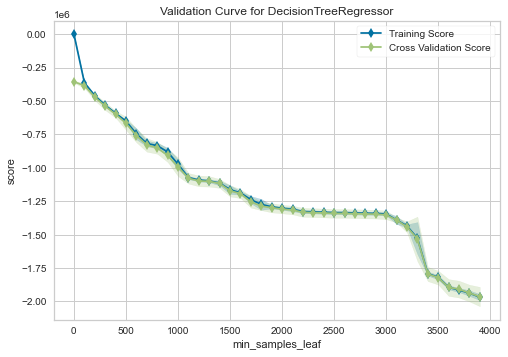

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='min_samples_leaf', ylabel='score'>

In [701]:
# Display the Validation Curve for the tuning of min_samples_leaf
dt_viz_min_samples_leaf.fit(X_train, y_train)
dt_viz_min_samples_leaf.show()

In [702]:
# Create Validation Curve for the fine tuning of min_samples_leaf
dt_viz_min_samples_leaf = ValidationCurve(\
                          dt, param_name="min_samples_leaf",\
                          param_range=np.arange(1,20,1), cv=5,\
                          scoring="neg_mean_squared_error")

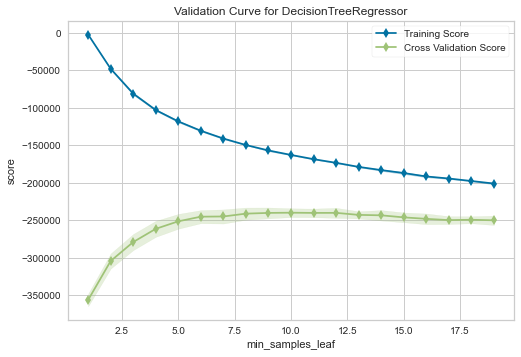

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='min_samples_leaf', ylabel='score'>

In [703]:
# Display the Validation Curve for the tuning of min_samples_leaf
dt_viz_min_samples_leaf.fit(X_train, y_train)
dt_viz_min_samples_leaf.show()

In [711]:
dt_params = {'max_depth':[9,10,11],'min_samples_leaf':[9,10,11]}
randomizedsearch_dt = RandomizedSearchCV(estimator = dt,\
                      param_distributions=dt_params, n_iter=25,\
                      scoring='neg_root_mean_squared_error', cv=5, verbose=1,\
                      random_state =1)

In [712]:
randomizedsearch_dt.fit(X_train, y_train)

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 9 is smaller than n_iter=25. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
                   n_iter=25,
                   param_distributions={'max_depth': [9, 10, 11],
                                        'min_samples_leaf': [9, 10, 11]},
                   random_state=1, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [713]:
print("Best parameters: " , randomizedsearch_dt.best_params_)
print("Smallest Magnitude of Root Mean-Squared Error: ",\
      randomizedsearch_dt.best_score_)

Best parameters:  {'min_samples_leaf': 9, 'max_depth': 11}
Smallest Magnitude of Root Mean-Squared Error:  -493.65891535783686


In [714]:
# Fit optimized Decision Tree model to all training data
best_dt = DecisionTreeRegressor(min_samples_leaf=9, max_depth=9,\
                                random_state=1)
best_dt.fit(X_train, y_train)
y_pred_train = best_dt.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
y_pred_test = best_dt.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Train Root Mean-Squared Error: %.2f' % rmse_train)
print('Test Root Mean-Squared Error: %.2f' % rmse_test)

Train Root Mean-Squared Error: 481.90
Test Root Mean-Squared Error: 506.60


In [745]:
best_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

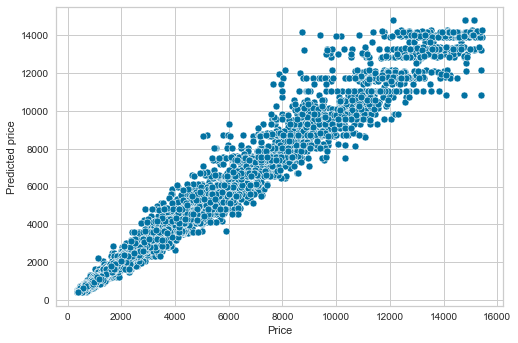

In [715]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_pred_test)
plt.ylabel('Predicted price')
plt.xlabel('Price')

In [716]:
r2_score(y_test,y_pred_test)

0.9771025923793711

In [717]:
y_diff = y_pred_test - y_test
print('Mean price difference: %.2f' %np.mean(np.abs(y_diff)))

Mean price difference: 289.73


/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Estimated price')

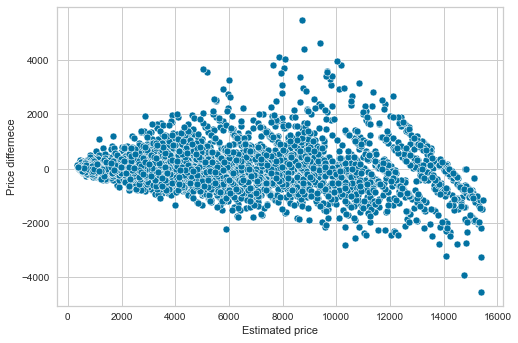

In [718]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_diff)
plt.ylabel('Price differnece')
plt.xlabel('Estimated price')

### 3. Optimizing K-Nearest Neighbour model

#### n_neighbors

n_neighbors is the number of nearest neighbors to consider.

The optimal number of nearest neighbors was 5 to 7.

In [719]:
# Create Validation Curve for the fine tuning of n_neighbors
knn_viz_n_neighbors = ValidationCurve(\
                      knn, param_name="n_neighbors",\
                      param_range=np.arange(1,20,1), cv=5,\
                      scoring="neg_mean_squared_error")

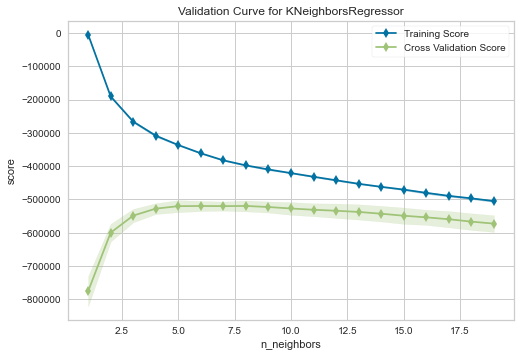

<AxesSubplot:title={'center':'Validation Curve for KNeighborsRegressor'}, xlabel='n_neighbors', ylabel='score'>

In [720]:
# Display the Validation Curve for the tuning of n_neighbors
knn_viz_n_neighbors.fit(X_train, y_train)
knn_viz_n_neighbors.show()

In [733]:
knn_params =  {'n_neighbors':[5,6,7]}
randomizedsearch_knn = RandomizedSearchCV(estimator = knn,\
                       param_distributions=knn_params, n_iter=25,\
                       scoring='neg_root_mean_squared_error', cv=5, verbose=1,\
                       random_state =1)

In [734]:
randomizedsearch_knn.fit(X_train, y_train)

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 3 is smaller than n_iter=25. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=25,
                   param_distributions={'n_neighbors': [5, 6, 7]},
                   random_state=1, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [735]:
print("Best parameters: " , randomizedsearch_knn.best_params_)
print("Smallest Magnitude of Root Mean-Squared Error: ",\
      randomizedsearch_knn.best_score_)

Best parameters:  {'n_neighbors': 6}
Smallest Magnitude of Root Mean-Squared Error:  -720.8224009452254


In [736]:
# Fit optimized K-Nearest Neighbor model to all training data
best_knn = KNeighborsRegressor(n_neighbors=6)
best_knn.fit(X_train, y_train)
y_pred_train = best_knn.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
y_pred_test = best_knn.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Train Root Mean-Squared Error: %.2f' % rmse_train)
print('Test Root Mean-Squared Error: %.2f' % rmse_test)

Train Root Mean-Squared Error: 577.39
Test Root Mean-Squared Error: 700.21


In [744]:
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Price')

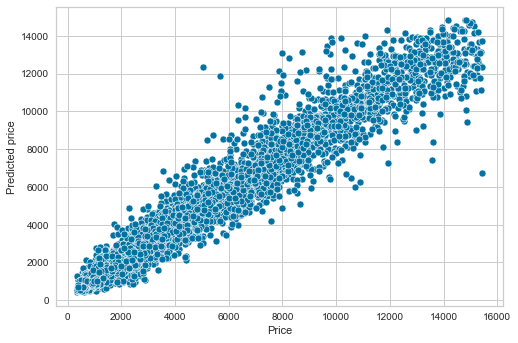

In [737]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_pred_test)
plt.ylabel('Predicted price')
plt.xlabel('Price')

In [738]:
y_diff = y_pred_test - y_test
print('Mean price difference: %.2f' %np.mean(np.abs(y_diff)))

Mean price difference: 423.15


In [739]:
r2_score(y_test,y_pred_test)

0.956256939362375

/Users/bona/Applications/miniconda2/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Estimated price')

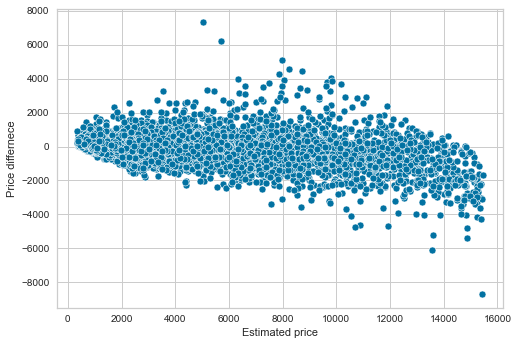

In [740]:
fig, ax = plt.subplots()
ax = sns.scatterplot(y_test, y_diff)
plt.ylabel('Price differnece')
plt.xlabel('Estimated price')

## Conclusion

Decision Tree algorithm was most robust and provided a test root mean squared error of 506.60 and R^2 of 0.98. The diamond price predicted by the model deviated from the actual price by only 289.73 dollars on average. 

Random Forest algorithm was the second best and provided a test root mean squared error of 556.74 and R^2 of 0.97. Feature importance analysis revealed 'carat' was by far the most importance feature for diamond price prediction. 'Clarity' and 'color' were the second and third most important features respectively.